In [1]:
#Aplicando o modelo de Regressão Logística no Dataset de Variáveis Numéricas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Data_Categorical = pd.read_csv('Dataset_Categorical.csv')

In [4]:
Data_Categorical

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
262,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
Data_Categorical['SARS-Cov-2 exam result'].sum()

19

In [ ]:
#Dividindo meu Dataset em Treinamento e Teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Data_Categorical.drop('SARS-Cov-2 exam result',axis=1), 
                                                    Data_Categorical['SARS-Cov-2 exam result'], test_size=0.20, 
                                                    random_state=101)

In [9]:
#Treinamento e Predição

In [9]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [10]:
predictions = logmodel.predict(X_test)

In [23]:
#Resultado

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       0.00      0.00      0.00         5

    accuracy                           0.91        53
   macro avg       0.45      0.50      0.48        53
weighted avg       0.82      0.91      0.86        53



C:\Users\lalas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(confusion_matrix(y_test,predictions))

[[48  0]
 [ 5  0]]


In [14]:
Data_Categorical['SARS-Cov-2 exam result'].value_counts()/Data_Categorical.shape[0]

0    0.928302
1    0.071698
Name: SARS-Cov-2 exam result, dtype: float64

In [40]:
#Tentando melhorar o modelo, considerando que está desbalanceado

# define class weights

w = {0:7.1698, 1:92.8302}

logmodel2 = LogisticRegression(class_weight=w)
logmodel2.fit(X_train,y_train)

predictions2 = logmodel.predict(X_test)

print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       0.00      0.00      0.00         5

    accuracy                           0.91        53
   macro avg       0.45      0.50      0.48        53
weighted avg       0.82      0.91      0.86        53



C:\Users\lalas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# get importance

importance = logmodel.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print(str(list(Data_Categorical.columns.values)[i]) + ' Score: %.5f' % (v))


SARS-Cov-2 exam result Score: -0.74861
Respiratory Syncytial Virus Score: -0.21840
Influenza A Score: -0.86408
Influenza B Score: -0.09741
Parainfluenza 1 Score: -0.27879
CoronavirusNL63 Score: -1.04166
Rhinovirus/Enterovirus Score: -0.18076
Coronavirus HKU1 Score: 0.00000
Parainfluenza 3 Score: -0.04573
Chlamydophila pneumoniae Score: -0.15840
Adenovirus Score: -0.23611
Parainfluenza 4 Score: -0.09741
Coronavirus229E Score: -0.20913
CoronavirusOC43 Score: -1.03198
Inf A H1N1 2009 Score: 0.00000
Bordetella pertussis Score: -0.20465
Metapneumovirus Score: 0.00000
Parainfluenza 2 Score: -0.35877
Influenza B, rapid test Score: -0.42245


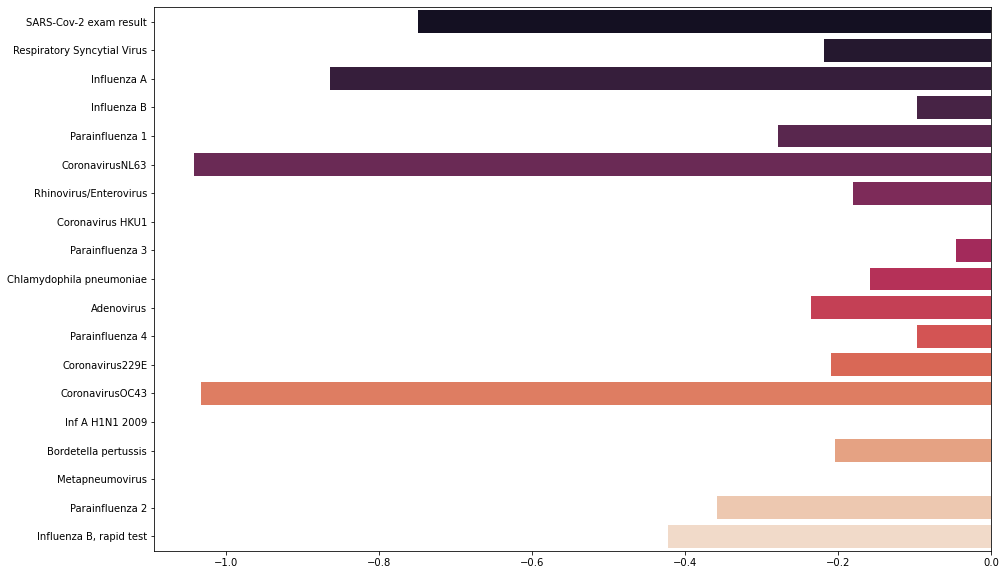

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(y=[str(list(Data_Categorical.columns.values)[y]) for y in range(len(importance))], x=importance, palette="rocket",orient="h")